In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

### We execute Condorcet,Condorcet Weighted,Comb MNZ e Comb Median on a random set of system and we progressively increased the number of system used

In [ ]:
path = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\RankFusion"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)
combList="condorcet.txt","condorcetWeighted.txt",'comb_mnz.txt','comb_median.txt'
results={}
        

for i in range(1,len(filename_list)+1,1):
    print i
    
    repeat=1
        
    results[i]={"condorcet.txt":0,"condorcetWeighted.txt":0,'comb_mnz.txt':0,'comb_median.txt':0}
    for j in range(0,repeat,1):
        perm=np.random.permutation(filename_list)[0:i]
        print "Ripetizione numero: "+str(j)
        #print perm
        #Calcolo condorcet e condercet_pesato
        condorcet_alg(perm, path, dir_norm, dir_comb)
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP=take_MAP(path,dir_comb,dir_w,filename,False)#calcolo il MAP
            results[i][filename]+=MAP
    #calcolo media per i sistemi   
    for filename in combList:
        results[i][filename]=results[i][filename]/repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0


In [35]:
print results

{1: {'condorcet.txt': 0.07279490096225999, 'comb_median.txt': 0.07279564593502, 'condorcetWeighted.txt': 0.07279490096225999, 'comb_mnz.txt': 0.07279564593502}, 2: {'condorcet.txt': 0.07335329191174, 'comb_median.txt': 0.07639875270928, 'condorcetWeighted.txt': 0.07749542777228, 'comb_mnz.txt': 0.0780066913558}, 3: {'condorcet.txt': 0.07822214922924, 'comb_median.txt': 0.07719588007539999, 'condorcetWeighted.txt': 0.07822295138344, 'comb_mnz.txt': 0.0784741379245}, 4: {'condorcet.txt': 0.07664187804744, 'comb_median.txt': 0.07603858120536, 'condorcetWeighted.txt': 0.07881017267824, 'comb_mnz.txt': 0.0781589924396}, 5: {'condorcet.txt': 0.07789801266368, 'comb_median.txt': 0.07614118288706, 'condorcetWeighted.txt': 0.07792408646638, 'comb_mnz.txt': 0.07852133107844}, 6: {'condorcet.txt': 0.07656936111664, 'comb_median.txt': 0.07540701334528001, 'condorcetWeighted.txt': 0.0774978049343, 'comb_mnz.txt': 0.07810390216344001}, 7: {'condorcet.txt': 0.0775107357839, 'comb_median.txt': 0.07498

In [36]:
keys=results.keys()
x=[]+keys
y1=[]
y2=[]
y3=[]
y4=[]

for i in range(1,len(keys)+1):
    y1.append(results[i]['condorcet.txt'])
    y2.append(results[i]['condorcetWeighted.txt'])
    y3.append(results[i]['comb_mnz.txt'])
    y4.append(results[i]['comb_median.txt'])

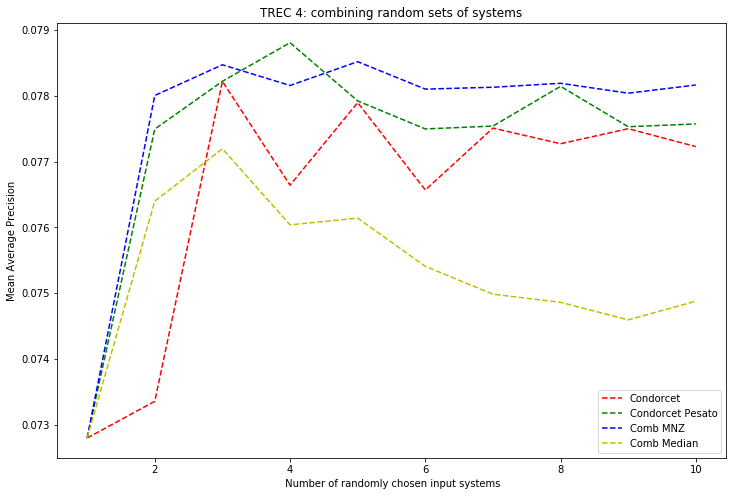

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]

plt.xlabel(' Number of randomly chosen input systems')
plt.ylabel('Mean Average Precision')
plt.title('TREC 5: combining random sets of systems')
plt.plot(x,y1,'r--',x,y2,'g--',x,y3,'b--',x,y4,'y--')
plt.legend(["Condorcet","Condorcet Pesato","Comb MNZ","Comb Median"])
plt.show()